# EDA - Análisis Bivariante
Relaciones entre variables del mercado inmobiliario de Madrid

In [2]:
# Importamos las librerías necesarias para análisis y visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cargamos el dataset limpio para estudiar relaciones entre variables
df = pd.read_csv("../data/Datos_clean.csv")

# Mostramos las primeras filas para comprobar que se ha cargado correctamente
df.head()

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace,precio_m2
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/,5144.93
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/,1637.36
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/,5416.67
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/,3362.07
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/,5107.14


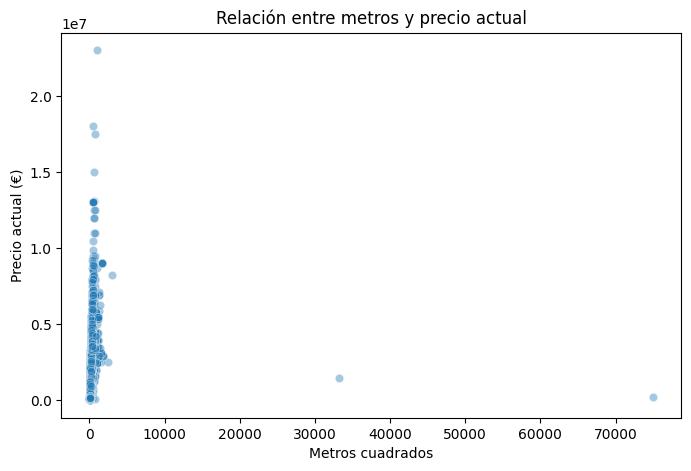

In [ ]:
def precio_metros_cuadrados():
    # Analizamos cómo cambia el precio total según los metros cuadrados del inmueble.
    # scatterplot permite ver la tendencia de crecimiento del precio con el tamaño
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x="metros", y="PrecioActual", alpha=0.4)
    plt.title("Relación entre metros y precio actual")
    plt.xlabel("Metros cuadrados")
    plt.ylabel("Precio actual (€)")

    # Guardado de la imagen
    plt.savefig("src/img/scatter_metros_precio.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

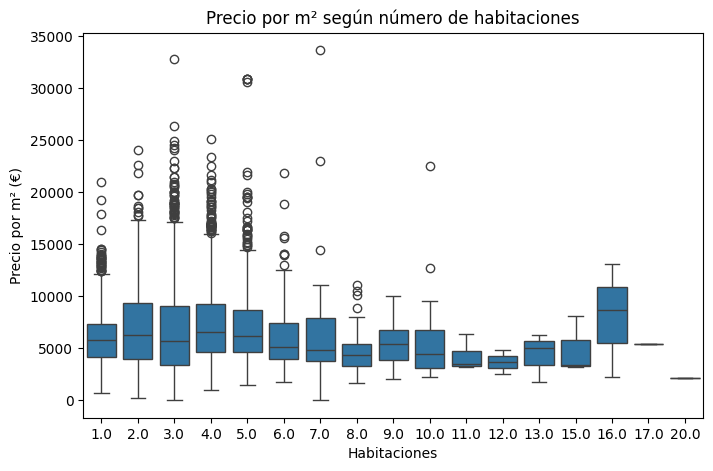

In [ ]:
def habitaciones_precio():
    # Analizamos si el número de habitaciones influye en el precio por metro cuadrado.
    # boxplot muestra la variación del precio por m² según número de habitaciones
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="habitaciones", y="precio_m2")
    plt.title("Precio por m² según número de habitaciones")
    plt.xlabel("Habitaciones")
    plt.ylabel("Precio por m² (€)")

    # Guardado de la imagen
    plt.savefig("src/img/box_habitaciones_precio_m2.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

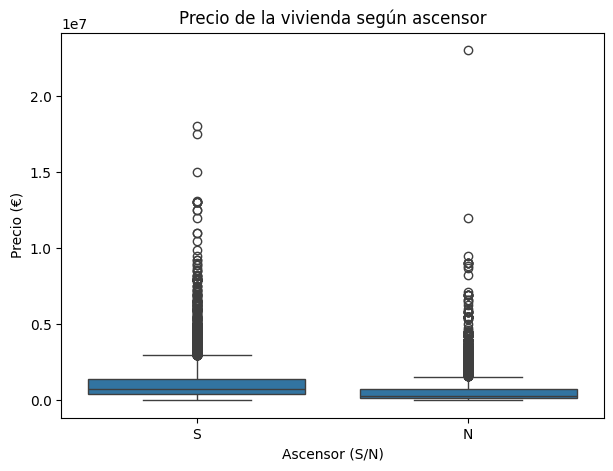

In [ ]:
def ascensor_precio():
    # Las viviendas con ascensor suelen tener mayor valor, especialmente si están en pisos altos.
    # boxplot muestra si hay diferencia de precio entre propiedades con o sin ascensor
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x="ascensor", y="PrecioActual")
    plt.title("Precio de la vivienda según ascensor")
    plt.xlabel("Ascensor (S/N)")
    plt.ylabel("Precio (€)")

    # Guardado
    plt.savefig("src/img/box_ascensor_precio.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

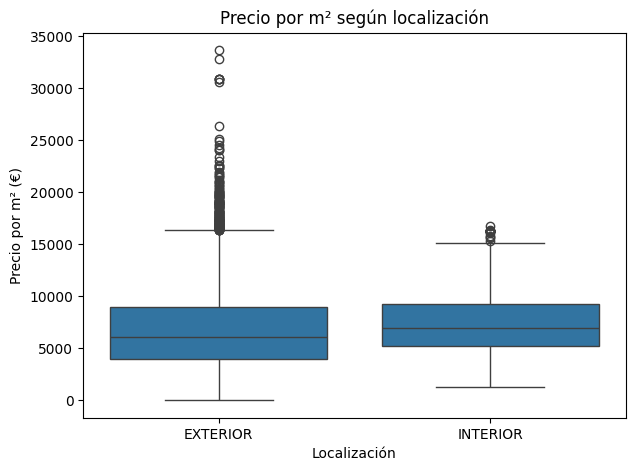

In [ ]:
def localizacion_precio():
    # Analizamos la relación entre la localización del inmueble y su precio por m².
    # Viviendas exteriores generalmente se venden más caras que las interiores
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x="localizacion", y="precio_m2")
    plt.title("Precio por m² según localización")
    plt.xlabel("Localización")
    plt.ylabel("Precio por m² (€)")

    # Guardado
    plt.savefig("src/img/box_localizacion_precio_m2.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

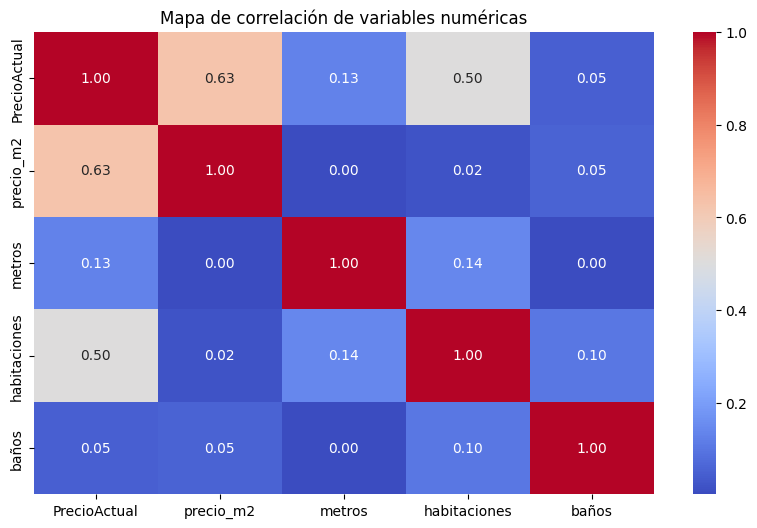

In [ ]:
def mapa_calor():
    # Usamos un mapa de calor para ver qué variables tienen más relación entre sí.
    # La correlación más fuerte indica qué variables afectan más al precio
    plt.figure(figsize=(10,6))
    sns.heatmap(df[["PrecioActual", "precio_m2", "metros", "habitaciones", "baños"]].corr(),
                annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de correlación de variables numéricas")

    # Guardado
    plt.savefig("src/img/heatmap_correlaciones.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

### Conclusiones del análisis bivariante

- **Superficie vs precio**: existe una relación positiva; a mayor tamaño, mayor precio, aunque se observan valores atípicos que podrían corresponder a edificios o errores.
- **Habitaciones**: el precio por m² no aumenta linealmente con las habitaciones, lo que indica que otros factores influyen más en el valor.
- **Ascensor**: las viviendas con ascensor presentan precios significativamente mayores, lo que confirma su influencia en el mercado.
- **Localización (interior/exterior)**: las viviendas exteriores son más caras por m², lo que coincide con las preferencias del mercado.
- **Correlación general**: la variable que mayor influencia tiene sobre el precio total es el número de metros cuadrados.

Este análisis confirma que **tamaño y características del edificio** son factores clave en el precio de la vivienda en Madrid.